In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:

import warnings
warnings.filterwarnings('ignore')


In [29]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [30]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Datasets/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Understanding Features:

Fixed acidity: Nonvolatile acids inherent to wine, including malic, lactic, tartaric, and citric acids.

Volatile acidity: Acetic acid levels affecting taste, derived from distillation of short-chain organic acids like formic and acetic acid.

Citric acid: Adds freshness and flavor, naturally found in citrus fruits, integral to the citric acid cycle.

Residual sugar: Remaining sugar post-fermentation, influencing sweetness, measured in grams per liter.

Chlorides: Salt content in wine, regulated to avoid exceeding legal limits.
Free sulfur dioxide: Reactive sulfites with germicidal and antioxidant properties.

Total sulfur dioxide: Sum of free and bound sulfur dioxide forms, impacting stability and preservation.

Density: Measured with a hydrometer, indicating liquid density compared to water.
pH: Acidity or basicity level affecting microbial stability and aging potential.

Sulphates: Wine additive contributing to sulfur dioxide levels, serving as an antimicrobial agent.

Alcohol: Percentage of alcohol content in the wine.

Quality: Subjective assessment based on sensory data, rated between 3 and 8.

# Data Preprocessing

In [31]:
# checking for null values
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [33]:
df['quality'].value_counts()


,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


# EDA

<Axes: xlabel='quality', ylabel='fixed acidity'>

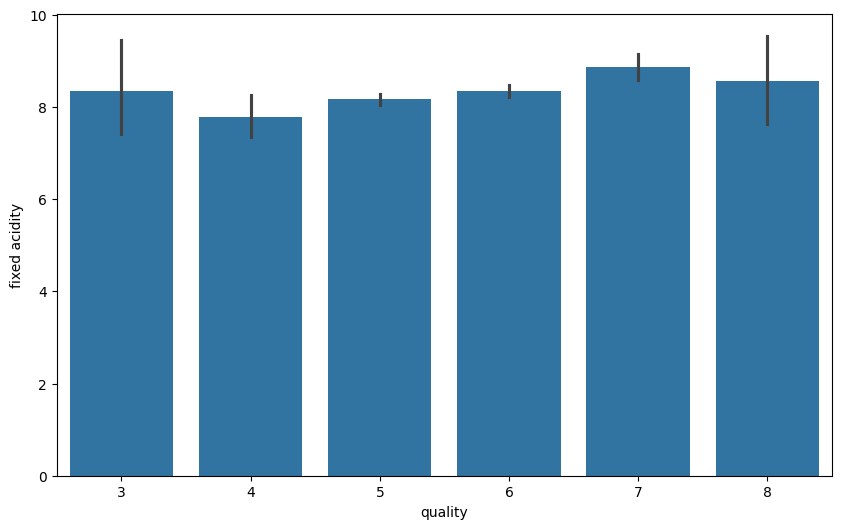

In [34]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

<Axes: xlabel='quality', ylabel='volatile acidity'>

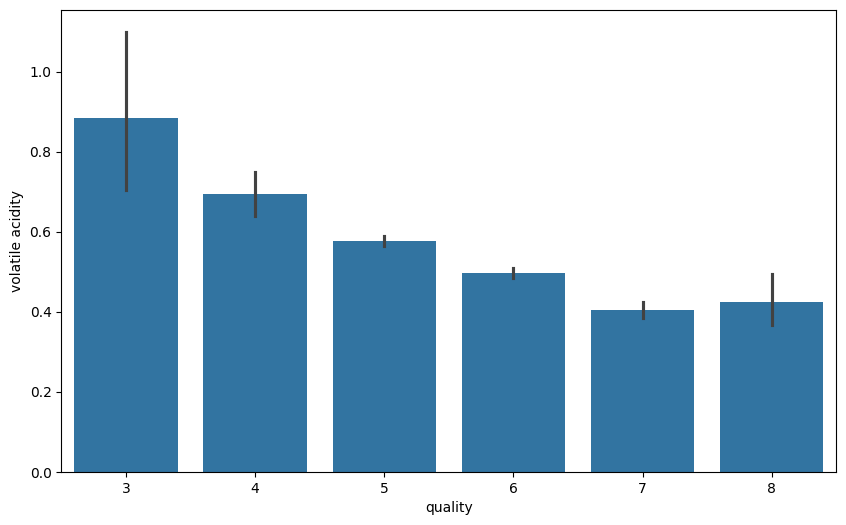

In [35]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

<Axes: xlabel='quality', ylabel='citric acid'>

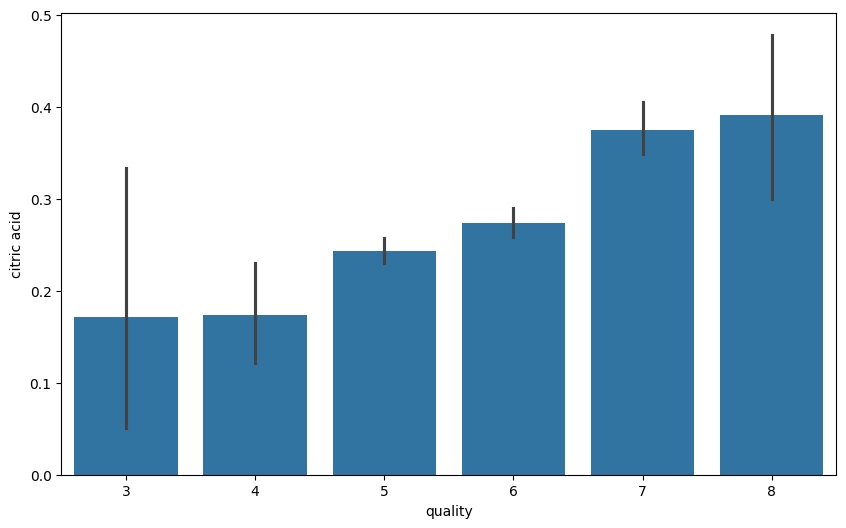

In [36]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

<Axes: xlabel='quality', ylabel='residual sugar'>

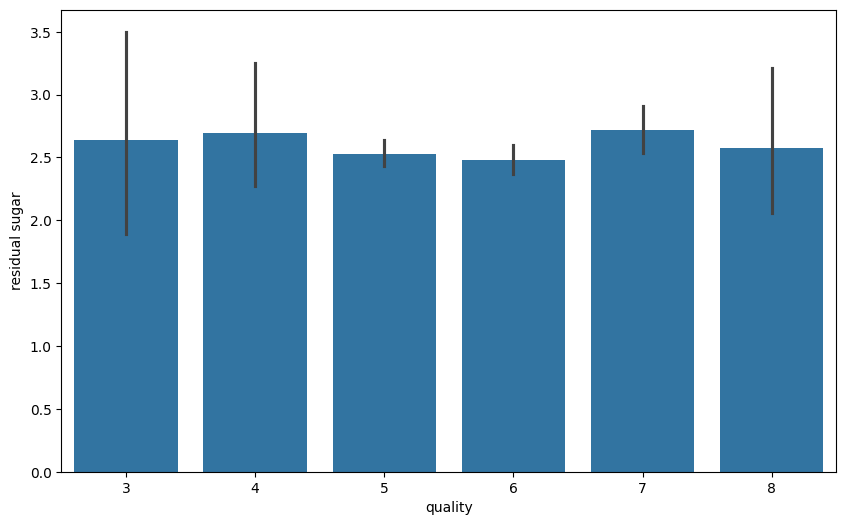

In [37]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

<Axes: xlabel='quality', ylabel='chlorides'>

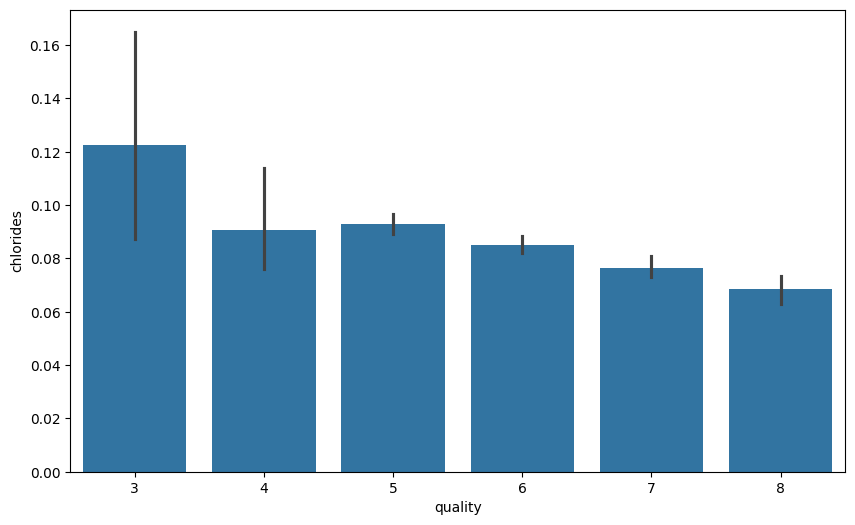

In [38]:

#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

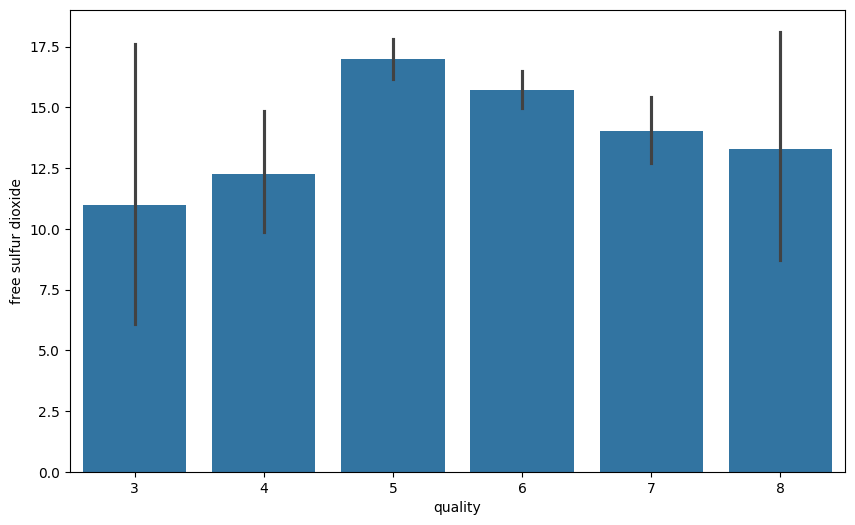

In [39]:

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

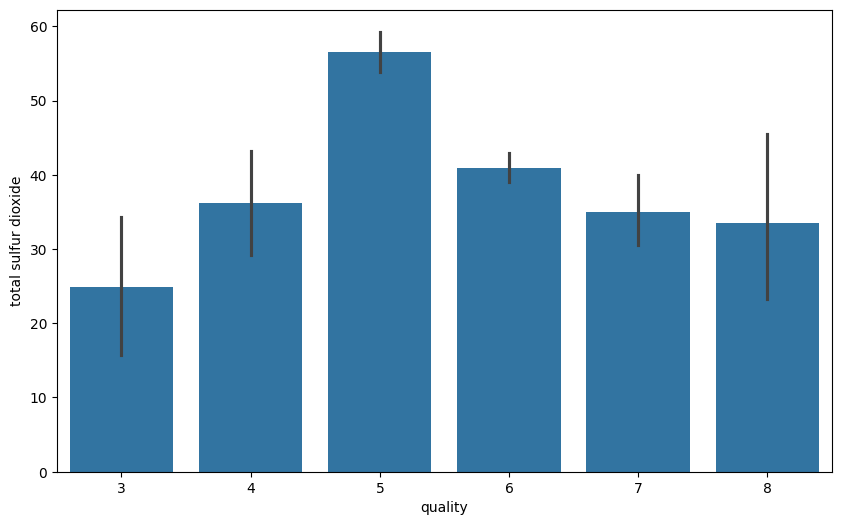

In [40]:

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

In [41]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
# bins = (2, 6.5, 8): This line defines the bins for categorizing the quality ratings.
# It divides the quality ratings into two groups: ratings below or equal to 6.5 are considered "bad", and ratings above 6.5 up to 8 are considered "good".
# These bins are used to classify the wines into two categories.
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [42]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [43]:
#Bad becomes 0 and good becomes 1
df['quality'] = label_quality.fit_transform(df['quality'])

In [44]:
df['quality'].value_counts()

,count
quality,
0,1382
1,217


<Axes: ylabel='count'>

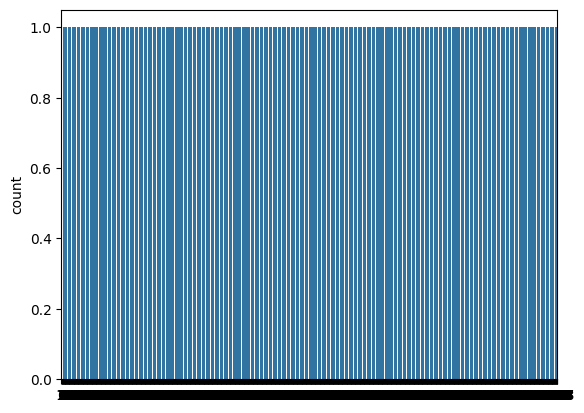

In [45]:
sns.countplot(df['quality'])


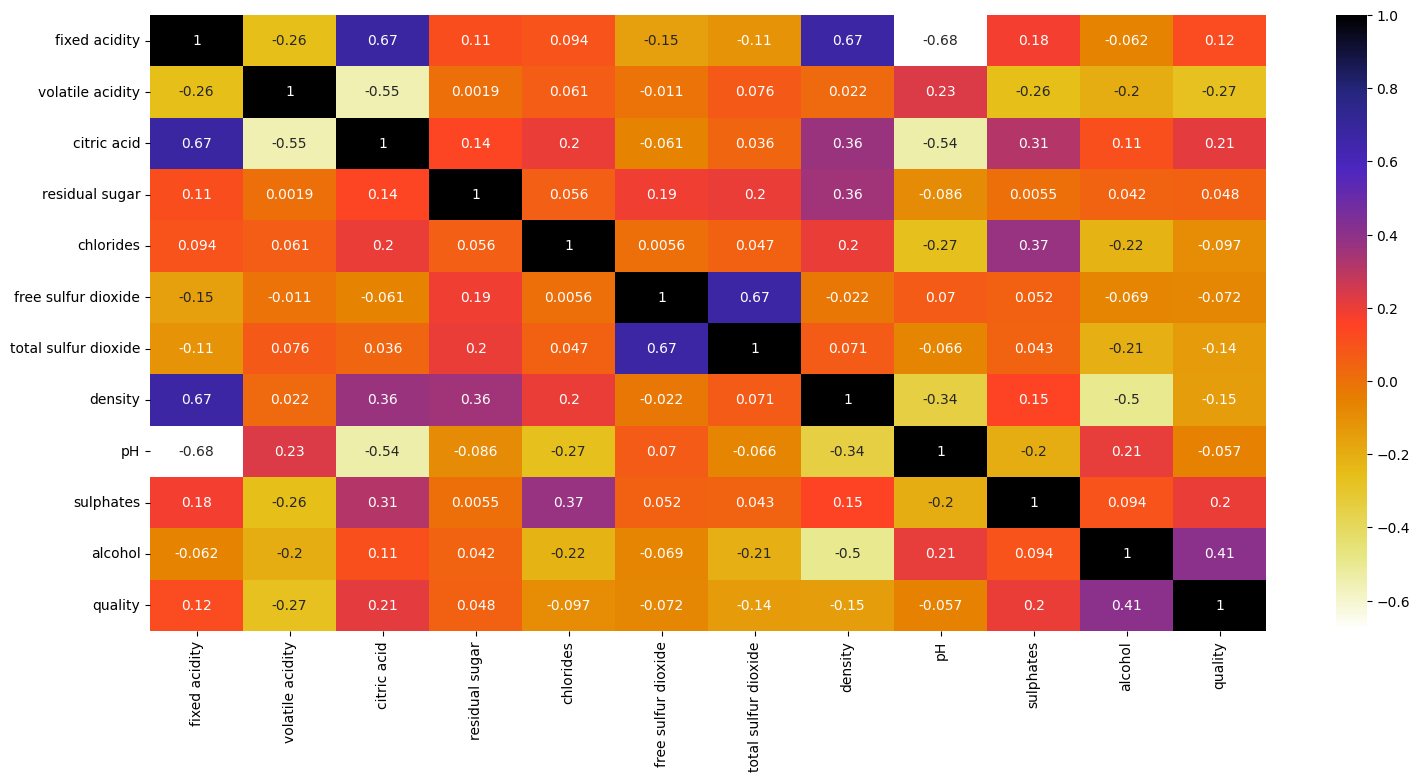

In [46]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [47]:
#Now seperate the dataset as response variable and feature variabes
X = df.drop('quality', axis = 1)
y = df['quality']

In [48]:
#Train and Test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [49]:

#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [50]:

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

knn = KNeighborsClassifier(n_neighbors=7)
gaus = GaussianNB()
svc = SVC()
dt = DecisionTreeClassifier(random_state = 1,criterion ='entropy', max_depth = 4)
rf = RandomForestClassifier(n_estimators=200)
xg = XGBClassifier(random_state = 1, n_estimators=200)
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME', random_state=1)

lst = [knn, gaus, svc, dt, rf, xg, adaboost]

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
for i in lst:
  print(i)
  i.fit(X_train, y_train)
  y_pred = i.predict(X_test)
  print("*********************************")
  print("Accuracy",accuracy_score(y_test, y_pred))
  print("*********************************")
  print(confusion_matrix(y_test, y_pred))
  print("*********************************")
  print(classification_report(y_test, y_pred))

KNeighborsClassifier(n_neighbors=7)
*********************************
Accuracy 0.875
*********************************
[[262  11]
 [ 29  18]]
*********************************
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.62      0.38      0.47        47

    accuracy                           0.88       320
   macro avg       0.76      0.67      0.70       320
weighted avg       0.86      0.88      0.86       320

GaussianNB()
*********************************
Accuracy 0.853125
*********************************
[[238  35]
 [ 12  35]]
*********************************
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       273
           1       0.50      0.74      0.60        47

    accuracy                           0.85       320
   macro avg       0.73      0.81      0.75       320
weighted avg       0.89      0.85      0.86       320

SVC()
********

# Hyper parameter tuning
The accuracy can be increased by tuning hyper parameters of these models using scikit learn randomized grid search.
**bold text**

In [53]:
from sklearn.model_selection import GridSearchCV
params_knn={
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}
clf_knn = GridSearchCV(knn, params_knn, cv=10, scoring ='accuracy')
clf_knn.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=7),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [54]:
params_sv={
    # 'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}
clf_sv = GridSearchCV(svc, params_sv, cv=10, scoring ='accuracy')
clf_sv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [55]:
params_dt={
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
clf_dt = GridSearchCV(dt, params_dt, cv=10, scoring ='accuracy')
clf_dt.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                              random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [56]:
params_rfc = {
    'n_estimators': [50, 100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    # 'max_features': ['auto', 'sqrt', 'log2'],
    # 'bootstrap': [True, False]
}
clf_rfc = GridSearchCV(rf, params_rfc, cv=10, scoring ='accuracy')
clf_rfc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [57]:
params_gaus = {
    # GaussianNB doesn't have many hyperparameters to tune
    # You can leave this empty or add any parameters you want to test
}

# Perform grid search cross-validation
clf_gaus = GridSearchCV(gaus, params_gaus, cv=10, scoring='accuracy')
clf_gaus.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GaussianNB(), param_grid={}, scoring='accuracy')

In [58]:
params_xgb = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7],
    # 'learning_rate': [0.01, 0.05, 0.1],
    # 'subsample': [0.8, 1.0],
    # 'colsample_bytree': [0.8, 1.0],
}

# Perform grid search cross-validation
clf_xgb = GridSearchCV(xg, params_xgb, cv=10, scoring='accuracy')
clf_xgb.fit(X_train, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
params_adaboost = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
}

# Perform grid search cross-validation
clf_adaboost = GridSearchCV(adaboost, params_adaboost, cv=10, scoring='accuracy')
clf_adaboost.fit(X_train, y_train)

In [ ]:
print("BEST PARAMETERS")

print("KNN ",clf_knn.best_params_)
print("SVC ",clf_sv.best_params_)
print("Decision Tree ",clf_dt.best_params_)
print("RandomForestClassifier ",clf_rfc.best_params_)
print("adaboost ",clf_adaboost.best_params_)
print("XGBoost ",clf_xgb.best_params_)


# PErform classification with best params


In [ ]:
knn1 = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 11, p= 1, weights= 'distance')
knn1.fit(X_train, y_train)
y_pred_knn = knn1.predict(X_test)
print(accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

In [ ]:
XGBoost1 = XGBClassifier( max_depth= 5,  n_estimators=50)
XGBoost1.fit(X_train, y_train)
y_pred_xgb = XGBoost1.predict(X_test)
print(accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

In [ ]:
adaboost1 = AdaBoostClassifier( learning_rate= 1,  n_estimators=100)
adaboost1.fit(X_train, y_train)
y_pred_ad = adaboost1.predict(X_test)
print(accuracy_score(y_test, y_pred_ad))
print(confusion_matrix(y_test, y_pred_ad))
print(classification_report(y_test, y_pred_ad))

In [ ]:
rf1 = RandomForestClassifier( criterion= 'entropy', max_depth= None,  n_estimators=200)
rf1.fit(X_train, y_train)
y_pred_rf = rf1.predict(X_test)
print(accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

In [ ]:
dt1 = DecisionTreeClassifier( criterion= 'gini', max_depth= 10, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 5)
dt1.fit(X_train, y_train)
y_pred_dt = dt1.predict(X_test)
print(accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

In [ ]:
models = ['XGB', 'Adaboost', 'Random Forest', 'Decision Tree', 'K-Nearest Neighbors']
accuracy = [accuracy_score(y_test, y_pred_xgb),
            accuracy_score(y_test, y_pred_ad),
            accuracy_score(y_test, y_pred_rf),
            accuracy_score(y_test, y_pred_dt),
            accuracy_score(y_test, y_pred_knn)]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracy)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)
plt.show()


In [ ]:
result =pd.DataFrame({
    'Algorithm':models,
    'Score':accuracy
})

result.sort_values(by='Score', inplace=True)
sns.set_palette("Purples")

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.barplot(x='Algorithm', y='Score', data=result)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result.Algorithm, rotation=300)
plt.show()

In [ ]:
y.value_counts()

# Over Sampling

In [ ]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=1)
x_os,y_os = os.fit_resample(X,y)

In [ ]:

from sklearn.preprocessing import MinMaxScaler
scalar_os = MinMaxScaler()
x_new_os = scalar_os.fit_transform(x_os,y_os)
x_new_os

In [ ]:
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(x_new_os,y_os,test_size=0.3,random_state=1)

In [ ]:
knn1 = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 11, p= 1, weights= 'distance')
knn1.fit(X_train_os, y_train_os)
y_pred_knn = knn1.predict(X_test_os)
print("Accuracy: ",accuracy_score(y_test_os, y_pred_knn))
print(confusion_matrix(y_test_os, y_pred_knn))
print(classification_report(y_test_os, y_pred_knn))

In [ ]:
from sklearn.model_selection import GridSearchCV
params_knn={
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}
clf_knn = GridSearchCV(knn1, params_knn, cv=10, scoring ='accuracy')
clf_knn.fit(X_train_os, y_train_os)

In [ ]:
print("KNN ",clf_knn.best_params_)


In [ ]:
knn1 = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 3, p= 2, weights= 'distance')
knn1.fit(X_train_os, y_train_os)
y_pred_knn = knn1.predict(X_test_os)
print(accuracy_score(y_test_os, y_pred_knn))
print(confusion_matrix(y_test_os, y_pred_knn))
print(classification_report(y_test_os, y_pred_knn))

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=7)
gaus1 = GaussianNB()
svc1 = SVC()
dt1 = DecisionTreeClassifier(random_state = 1,criterion ='entropy', max_depth = 4)
rf1 = RandomForestClassifier(n_estimators=200)
xg1 = XGBClassifier(random_state = 1, n_estimators=200)
adaboost1 = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=1)

lst = [knn2, gaus1, svc1, dt1, rf1, xg1, adaboost1]

In [ ]:
for i in lst:
  print(i)
  i.fit(X_train_os, y_train_os)
  y_pred_os = i.predict(X_test_os)
  print("*********************************")
  # print("Accuracy",accuracy_score(y_test_os, y_pred_os))
  print("*********************************")
  print(confusion_matrix(y_test_os, y_pred_os))
  print("*********************************")
  print(classification_report(y_test_os, y_pred_os))

# Hyper parameter tuning after sampling

In [ ]:
clf_rfc = GridSearchCV(rf, params_rfc, cv=10, scoring ='accuracy')
clf_rfc.fit(X_train_os, y_train_os)

In [ ]:
print("RandomForestClassifier ",clf_rfc.best_params_)


In [ ]:
rf1 = RandomForestClassifier( criterion= 'gini', max_depth= None,  n_estimators=150)
rf1.fit(X_train_os, y_train_os)
y_pred_rf1= rf1.predict(X_test_os)
print(accuracy_score(y_test_os, y_pred_rf1))
print(confusion_matrix(y_test_os, y_pred_rf1))
print(classification_report(y_test_os, y_pred_rf1))

In [ ]:
clf_xgb = GridSearchCV(xg, params_xgb, cv=10, scoring='accuracy')
clf_xgb.fit(X_train_os, y_train_os)

In [ ]:
print("XGBoost ",clf_xgb.best_params_)



In [ ]:
XGBoost1 = XGBClassifier( max_depth= 7,  n_estimators=200)
XGBoost1.fit(X_train_os, y_train_os)
y_pred_xgb = XGBoost1.predict(X_test_os)
print(accuracy_score(y_test_os, y_pred_xgb))
print(confusion_matrix(y_test_os, y_pred_xgb))
print(classification_report(y_test_os, y_pred_xgb))

https://www.kaggle.com/code/eisgandar/red-wine-quality-eda-classification

https://www.kaggle.com/code/nimapourmoradi/red-wine-quality

https://www.kaggle.com/code/sisharaneranjana/advanced-analysis-with-resampling/notebook